<a href="https://colab.research.google.com/github/haviet12/Artificial_Inteligent/blob/main/Feature_of_Face.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.optimizers import Adam
from keras.layers import LeakyReLU

from os import listdir
from numpy import asarray,save
from keras.utils import load_img, img_to_array

In [30]:
img = load_img('/content/drive/MyDrive/MyPicture/Feature_OF_Face/test/6800.png')
img.size

(48, 48)

In [31]:
### thay doi ti le anh tu 0->255 thanh 0->1
train = ImageDataGenerator(rescale =1.0/255.0)
val = ImageDataGenerator(rescale=1.0/255.0)

In [38]:
train_data = train.flow_from_directory('/content/drive/MyDrive/MyPicture/Feature_OF_Face/train', target_size=(48,48),class_mode='categorical')
val_data = val.flow_from_directory('/content/drive/MyDrive/MyPicture/Feature_OF_Face/val', target_size=(48,48), class_mode='categorical')

Found 13062 images belonging to 6 classes.
Found 2963 images belonging to 6 classes.


In [39]:
print('train_index :', train_data.class_indices)
print('test_index:', val_data.class_indices)

train_index : {'Angry': 0, 'Disgust': 1, 'Fear': 2, 'Happy': 3, 'Sad': 4, 'Surprise': 5}
test_index: {'Angry': 0, 'Disgust': 1, 'Fear': 2, 'Happy': 3, 'Sad': 4, 'Surprise': 5}


In [40]:
model= Sequential()
## lop CNN1
model.add(Conv2D(32, kernel_size=(3,3), activation='linear',input_shape=(48,48,3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2), padding='same'))
## lop CNN2
model.add(Conv2D(64,(3,3),activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2), padding='same'))
## lop CNN3
model.add(Conv2D(128,(3,3),activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2), padding='same'))

batch_size=128
epochs =30
classes =6

In [41]:
# chuyen du lieu tu CNN ve ANN ( 2 chieu ve 1 chieu)
model.add(Flatten())
##lop hidden1
model.add(Dense(256,activation='linear'))
model.add(LeakyReLU(alpha=0.1))
# lop outpu
model.add(Dense(classes, activation='softmax'))

In [42]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 48, 48, 32)        896       
                                                                 
 leaky_re_lu_8 (LeakyReLU)   (None, 48, 48, 32)        0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 24, 24, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 leaky_re_lu_9 (LeakyReLU)   (None, 24, 24, 64)        0         
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                  

In [43]:
history=model.fit(train_data,epochs=30,batch_size=64,verbose=1, 
                  validation_data=val_data)

Epoch 1/30
409/409 [==============================] - 36s 85ms/step - loss: 1.5586 - accuracy: 0.3401 - val_loss: 1.4074 - val_accuracy: 0.4404
Epoch 2/30
409/409 [==============================] - 27s 67ms/step - loss: 1.3186 - accuracy: 0.4626 - val_loss: 1.2250 - val_accuracy: 0.5127
Epoch 3/30
409/409 [==============================] - 27s 67ms/step - loss: 1.1589 - accuracy: 0.5349 - val_loss: 1.2060 - val_accuracy: 0.5086
Epoch 4/30
409/409 [==============================] - 28s 67ms/step - loss: 1.0036 - accuracy: 0.5998 - val_loss: 1.1830 - val_accuracy: 0.5383
Epoch 5/30
409/409 [==============================] - 28s 68ms/step - loss: 0.8110 - accuracy: 0.6909 - val_loss: 1.1731 - val_accuracy: 0.5640
Epoch 6/30
409/409 [==============================] - 28s 67ms/step - loss: 0.6047 - accuracy: 0.7732 - val_loss: 1.2891 - val_accuracy: 0.5606
Epoch 7/30
409/409 [==============================] - 27s 67ms/step - loss: 0.3862 - accuracy: 0.8606 - val_loss: 1.6216 - val_accuracy:

In [44]:
value=model.evaluate(train_data,verbose=0)
print('loss', value[0])
print('accuracy', value[1])

loss 0.07970179617404938
accuracy 0.9758842587471008


<ipython-input-45-a90348040cf5>:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, accuracy, 'bo', label='Training accuracy', color='green')


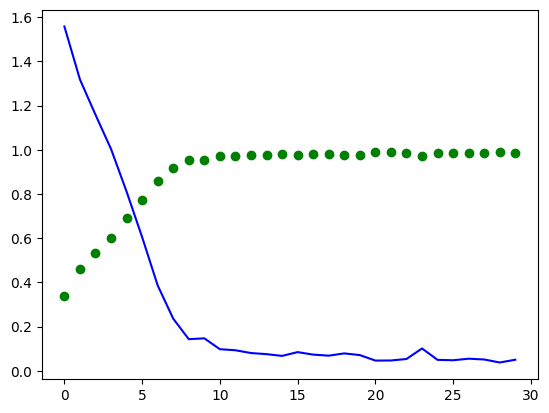

In [45]:
model.save('/content/drive/MyDrive/MyPicture/Feature_OF_Face/model_f.h5')
accuracy =history.history['accuracy']
loss = history.history['loss']
epochs=range(len(accuracy))

import matplotlib.pyplot as plt
plt.plot(epochs, accuracy, 'bo', label='Training accuracy', color='green')
plt.plot(epochs,loss , 'b', label ='Training loss')
plt.show()

1/1 [==============================] - 0s 174ms/step
Predicted:  Surprise


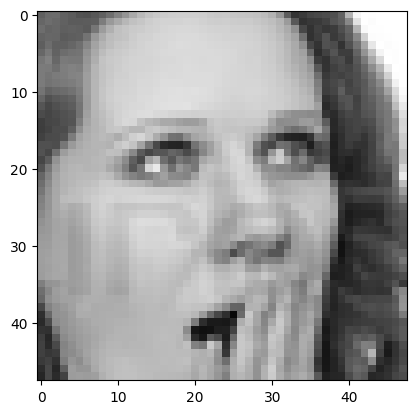

In [46]:
emotion = ['Angry','Disgust','Fear','Happy','Sad','Surprise']

filePath = '/content/drive/MyDrive/MyPicture/Feature_OF_Face/test/6802.png'
testImage = load_img(filePath, color_mode = 'rgb', target_size=(48,48))
arrayImage = img_to_array(testImage).reshape(1,48,48,3)/255
pred = int(np.argmax(model.predict(arrayImage)))
print("Predicted: ", emotion[pred])
plt.imshow(testImage)

1/1 [==============================] - 0s 99ms/step
Predicted:  Sad


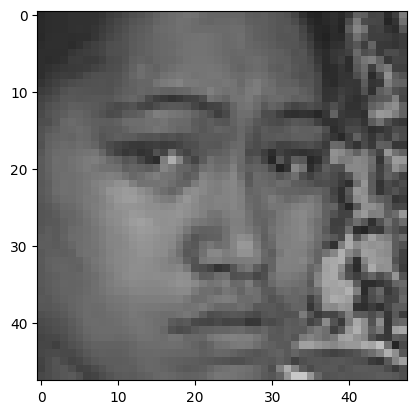

In [48]:
filePath = '/content/drive/MyDrive/MyPicture/Feature_OF_Face/test/6848.png'
testImage = load_img(filePath, color_mode = 'rgb', target_size=(48,48))
arrayImage = img_to_array(testImage).reshape(1,48,48,3)/255
pred = int(np.argmax(model.predict(arrayImage)))
print("Predicted: ", emotion[pred])
plt.imshow(testImage)

1/1 [==============================] - 0s 18ms/step
Predicted:  Happy


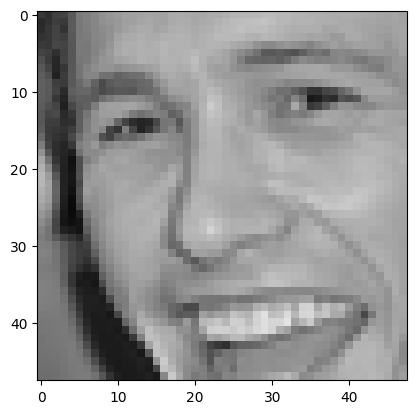

In [49]:
filePath = '/content/drive/MyDrive/MyPicture/Feature_OF_Face/test/6870.png'
testImage = load_img(filePath, color_mode = 'rgb', target_size=(48,48))
arrayImage = img_to_array(testImage).reshape(1,48,48,3)/255
pred = int(np.argmax(model.predict(arrayImage)))
print("Predicted: ", emotion[pred])
plt.imshow(testImage)